In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.DataFrame({'ID' : ['1001', '1001', '1002', '1002', '1003', '1003', '1004', '1004', '1005', '1005'], 
                     'type' : ['A', 'B', 'A', 'A','A', 'B','A', 'B','B', 'B'], 
                     'area' : [123, 23, 43, 182, 98, 58, 210, 10, 150, 50]})

In [37]:
group_data = data.groupby(['ID','type'], as_index=False)[['area']].sum()
group_data

,ID,type,area
0,1001,A,123
1,1001,B,23
2,1002,A,225
3,1003,A,98
4,1003,B,58
5,1004,A,210
6,1004,B,10
7,1005,B,200


In [38]:
pivot_data = group_data.pivot(index = 'ID', columns = 'type', values = 'area')

In [39]:
print('='*50,'\n<group_data>의 피벗 테이블')
print('\n<pivot_data>')
pivot_data

<group_data>의 피벗 테이블

<pivot_data>


type,A,B
ID,,
1001,123.0,23.0
1002,225.0,NaN
1003,98.0,58.0
1004,210.0,10.0
1005,NaN,200.0


In [40]:
print('='*50)
print('<pivot_data> reset_index 진행')
pivot_data.reset_index(drop=False, inplace = True)
pivot_data

<pivot_data> reset_index 진행


type,ID,A,B
0,1001,123.0,23.0
1,1002,225.0,NaN
2,1003,98.0,58.0
3,1004,210.0,10.0
4,1005,NaN,200.0


In [41]:
print('='*50)
print('<melt_data> melt 진행')
print('ID_value는 기준이 되는 데이터, value_vars 어떻게 줄을 세울지')
melt_data = pd.melt( pivot_data, id_vars = 'ID', value_vars =['A','B'])
melt_data

<melt_data> melt 진행
ID_value는 기준이 되는 데이터, value_vars 어떻게 줄을 세울지


,ID,type,value
0,1001,A,123.0
1,1002,A,225.0
2,1003,A,98.0
3,1004,A,210.0
4,1005,A,NaN
5,1001,B,23.0
6,1002,B,NaN
7,1003,B,58.0
8,1004,B,10.0
9,1005,B,200.0


<Axes: xlabel='value'>

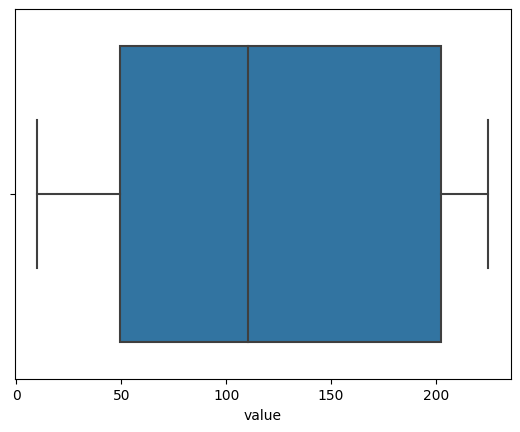

In [42]:
sns.boxplot( data=melt_data, x='value' )

<Axes: xlabel='value', ylabel='type'>

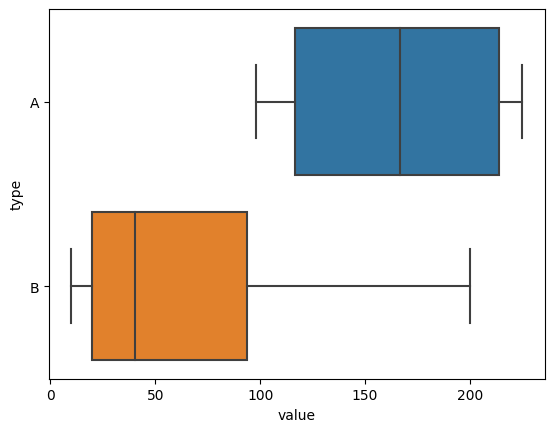

In [43]:
sns.boxplot(data = melt_data, x='value', y='type')